In [1]:
'''k-means clusterer'''
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
data_points = 2000
k = 6
x,y = make_blobs(n_samples=data_points,n_features=2,
                centers=k,random_state=5)
kmeans_cluster = KMeans(n_clusters=k)
y_predicted = kmeans_cluster.fit_predict(x)


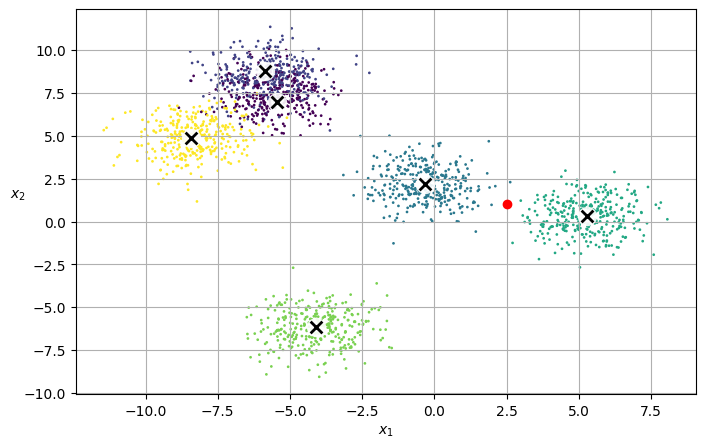

In [3]:
# Generate isotropic Gaussian blobs for clustering
x_topredict = np.array([[2.5,1]])
plt.figure(figsize=(8, 5))
plt.scatter(x[:,0],x[:,1],c=y,s=0.9)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.plot(x_topredict[0,0],x_topredict[0,1],'ro')
for i,j in kmeans_cluster.cluster_centers_:
  plt.scatter(i,j,marker='x', s=2, linewidths=12,
              color='k',zorder=11, alpha=1)
  plt.scatter(i,j,marker='o', s=35, linewidths=8,
              color='w',zorder=9, alpha=0.9)
plt.grid()
plt.show()

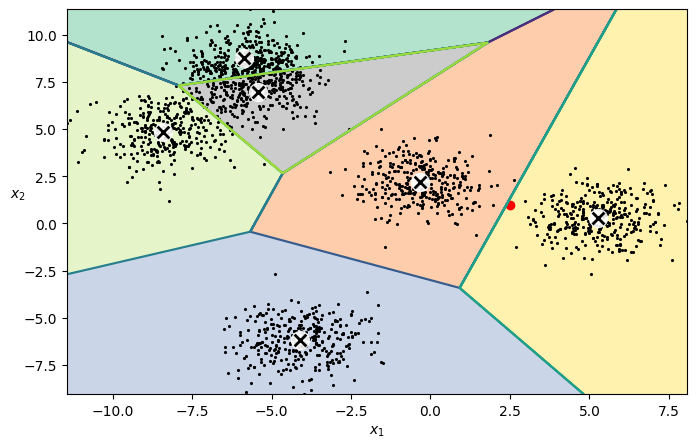

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
k = 6
x_topredict = np.array([[2.5,1]])
plt.figure(figsize=(8, 5))
plt.plot(x[:,0],x[:,1],'k.',markersize=2.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.plot(x_topredict[0,0],x_topredict[0,1],'ro')
for i,j in kmeans_cluster.cluster_centers_:
  plt.scatter(i,j,marker='x', s=2, linewidths=12,
              color='k',zorder=11, alpha=1)
  plt.scatter(i,j,marker='o', s=35, linewidths=8,
              color='w',zorder=9, alpha=0.9)
x.shape,y.shape
xx,yy = np.meshgrid(np.linspace(min(x[:,0]),max(x[:,0]),data_points),
                    np.linspace(min(x[:,1]),max(x[:,1]),data_points))
z = kmeans_cluster.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(z,extent=(min(
    x[:,0]),max(x[:,0]),min(x[:,1]),max(x[:,1])),cmap="Pastel2")
plt.contour(z,color='k',extent=(min(
    x[:,0]),max(x[:,0]),min(x[:,1]),max(x[:,1])))
plt.show()

In [5]:
min(x[:,1]),max(x[:,1])

(-9.057073042838326, 11.353622833652967)

In [6]:
# Each instance is assigned to one of the 6 clusters:

y_predicted

array([3, 1, 4, ..., 0, 4, 0], dtype=int32)

In [7]:
kmeans_cluster.labels_==y_predicted

array([ True,  True,  True, ...,  True,  True,  True])

In [8]:
# Cluster centroids
kmeans_cluster.cluster_centers_,kmeans_cluster.cluster_centers_[0]

(array([[-5.86122242,  8.74887995],
        [-0.32147103,  2.1791903 ],
        [-4.10062209, -6.18000214],
        [-8.41569873,  4.8497586 ],
        [ 5.27098052,  0.31150687],
        [-5.43971664,  6.94664583]]),
 array([-5.86122242,  8.74887995]))

In [9]:
kmeans_cluster.labels_

array([3, 1, 4, ..., 0, 4, 0], dtype=int32)

In [10]:
# let's predict the cluster of a new instanse (red dot on figure)
kmeans_cluster.predict(x_topredict)

array([4], dtype=int32)

In [11]:
"""Soft Clustering to measure the distance of each instance to all 6 centroids"""
kmeans_cluster.transform(x_topredict) # closest to cluster 2 as predicted above

array([[11.39978863,  3.05797131,  9.75298122, 11.57467581,  2.85523306,
         9.91976294]])

In [12]:
kmeans_cluster.inertia_,kmeans_cluster.score(x)

(3635.475526963795, -3635.475526963794)

In [13]:
# How to choose the number of clusters:
from sklearn.metrics import silhouette_score
silhouette_score(x,kmeans_cluster.labels_), silhouette_score(x,y_predicted)

(0.5602955068417862, 0.5602955068417862)

[0.31588079534854707, 0.3305661918882241, 0.31124832287000637, 0.31389226906618195, 0.32661684101756555, 0.3325890426938317, 0.3225751490899547, 0.3221189789085399]


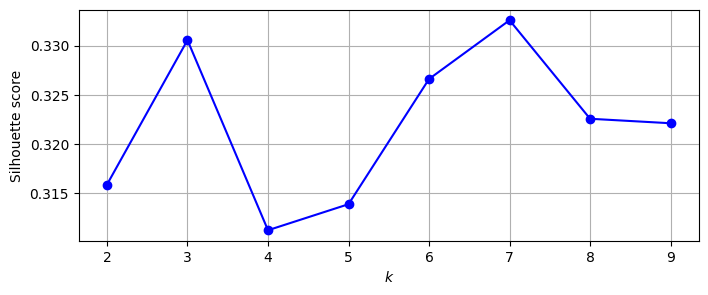

In [36]:
k_values = np.arange(2,10,1)
plt.figure(figsize=(8, 3))

labels=[]
for each in k_values:
  kmeans_cluster2 = KMeans(n_clusters=each)
  kmeans_cluster2.fit(x)
  labels.append(silhouette_score(x,kmeans_cluster2.labels_))
print(labels)
plt.grid()
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(k_values,labels,'bo-')
plt.show()
# This confirms that k = 7 and k = 6 are quite good.